In [ ]:
#US Consumer Finance Complaints Data Analysis 
#Python, Tableau
#https://www.kaggle.com/code/hussainfazil/us-consumer-finance-complaints-analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/consumer_complaints.csv")
df["date_received"] = pd.to_datetime(df["date_received"], utc=True)
df.head(5) 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,2013-08-30 00:00:00+00:00,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,2013-08-30 00:00:00+00:00,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,2013-08-30 00:00:00+00:00,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,2013-08-30 00:00:00+00:00,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,2013-08-30 00:00:00+00:00,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


Data Exploration - 507,128 unique values, 18 columns

In [ ]:
df.shape

(555957, 18)

In [ ]:
#check columns
df.dtypes

date_received                   datetime64[ns, UTC]
product                                      object
sub_product                                  object
issue                                        object
sub_issue                                    object
consumer_complaint_narrative                 object
company_public_response                      object
company                                      object
state                                        object
zipcode                                      object
tags                                         object
consumer_consent_provided                    object
submitted_via                                object
date_sent_to_company                         object
company_response_to_consumer                 object
timely_response                              object
consumer_disputed?                           object
complaint_id                                  int64
dtype: object

In [ ]:
#check missing values
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

In [ ]:
#sorted years for the data 
yr = df.date_received.dt.year.unique()
yr

array([2013, 2014, 2015, 2016, 2012, 2011])

Exploratory Data Analysis

*   Category that Received Most Complaints
*   Mortgage Complaints Counts by Year 2014, 2015, 2016
*   Top 10 Companies with Most Complaints
* Top companies that provided timely response 



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

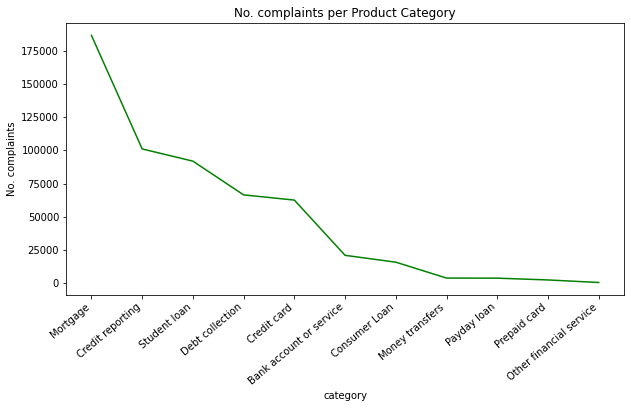

In [ ]:
#Category of product that received most complaints
#Top 3 - Mortgage, Credit Reporting, Student Loan

x = df['product'].unique()
y = df['product'].value_counts()

plt.figure(figsize=(10,5))
plt.plot(x, y, color='green')
plt.xlabel('category')
plt.ylabel('No. complaints')
plt.title('No. complaints per Product Category')
plt.xticks(rotation=400,horizontalalignment='right')


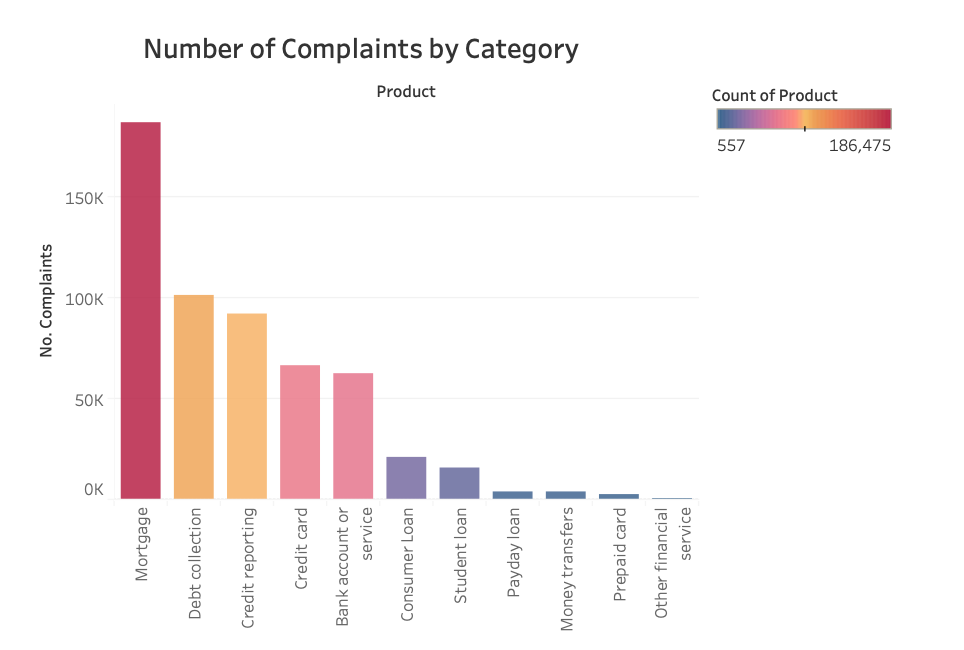

In [ ]:
#Top 10 Sate with most complaints
state = df.groupby(['state']).agg({'complaint_id':'count'})
state.rename(columns={'complaint_id':'#Complaints'}, inplace=True)
#state.insert(0, "state", state.index, True)
state = state.sort_values(by=['#Complaints'], ascending=False)[:5]
state

,#Complaints
state,
CA,81700
FL,53673
TX,41352
NY,38266
GA,24548


In [ ]:
#Top 10 Sate with most MORTGAGE complaints
Mortg_state = df.loc[df['product'] == 'Mortgage'].groupby(['state']).agg({'product' : 'count'})
Mortg_state.rename(columns={'product':'# Mortg Complaints'}, inplace=True)
#Mortg_state.insert(0, "state", state.index, True)
Mortg_state = Mortg_state.sort_values(by=['# Mortg Complaints'], ascending=False)[:5]
Mortg_state

,# Mortg Complaints
state,
CA,32988
FL,20636
NY,11446
GA,9468
TX,8899


In [ ]:
#Top 10 Sate with most Debt Collection complaints
Debt_state = df.loc[df['product'] == 'Debt collection'].groupby(['state']).agg({'product' : 'count'})
Debt_state.rename(columns={'product':'# Debt Complaints'}, inplace=True)
#Mortg_state.insert(0, "state", state.index, True)
Debt_state = Debt_state.sort_values(by=['# Debt Complaints'], ascending=False)[:5]
Debt_state

,# Debt Complaints
state,
CA,13568
TX,9931
FL,9306
NY,5832
GA,4299


In [ ]:
#Top 10 Sate with most Credit reporting complaints
Credit_state = df.loc[df['product'] == 'Credit reporting'].groupby(['state']).agg({'product' : 'count'})
Credit_state.rename(columns={'product':'# Credit Complaints'}, inplace=True)
#Mortg_state.insert(0, "state", state.index, True)
Credit_state = Credit_state.sort_values(by=['# Credit Complaints'], ascending=False)[:5]
Credit_state

,# Credit Complaints
state,
CA,11965
TX,11133
FL,8891
NY,6095
GA,4110


In [ ]:
#Total complaints by month in 2012-2015

#1) Data from 2015 
df2015 = df[df.date_received.dt.year==2015]

#2) group by month of 2015 for No. complaints
CP_2015 = df2015.groupby(df2015.date_received.dt.month).agg({'complaint_id':'count'})
CP_2015['Month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
CP_2015.rename(columns={'complaint_id':'#Complaints'},inplace=True)


#1) Data from 2014 
df2014 = df[df.date_received.dt.year==2014]

#2) group by month of 2014 for No. complaints
CP_2014 = df2014.groupby(df2014.date_received.dt.month).agg({'complaint_id':'count'})
CP_2014['Month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
CP_2014.rename(columns={'complaint_id':'#Complaints'},inplace=True)



#1) Data from 2013 
df2013 = df[df.date_received.dt.year==2013]

#2) group by month of 2015 for No. complaints
CP_2013 = df2013.groupby(df2013.date_received.dt.month).agg({'complaint_id':'count'})
CP_2013['Month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
CP_2013.rename(columns={'complaint_id':'#Complaints'},inplace=True)



#1) Data from 2012
df2012 = df[df.date_received.dt.year==2012]

#2) group by month of 2015 for No. complaints
CP_2012 = df2012.groupby(df2012.date_received.dt.month).agg({'complaint_id':'count'})
CP_2012['Month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
CP_2012.rename(columns={'complaint_id':'#Complaints'},inplace=True)

Text(0.5, 1.0, 'Complaints Count by Year')

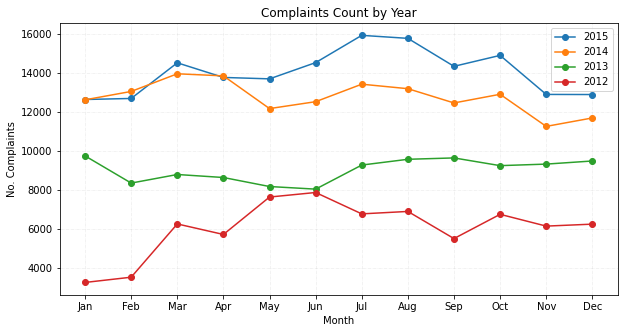

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(CP_2015['Month'], CP_2015['#Complaints'], marker='o')
plt.plot(CP_2014['Month'], CP_2014['#Complaints'], marker='o')
plt.plot(CP_2013['Month'], CP_2013['#Complaints'], marker='o')
plt.plot(CP_2012['Month'], CP_2012['#Complaints'], marker='o')

plt.legend(['2015','2014','2013','2012'])
plt.xlabel('Month')
plt.ylabel('No. Complaints')
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.title('Complaints Count by Year')

In [ ]:
#Mortgage complain by month in 2016 - ONLY from Jan-Mar

#1) Data from 2016 - 16888 total complaints of all categories
df2016 = df[df.date_received.dt.year==2016]

#2) Mortgage data from 2016 - 3593 total complaints 
df2016_mg = df2016.loc[df2016['product'] == 'Mortgage']

#3) group by month of 2016 for Mortgage complaints
Complaints_2016 = df2016_mg.groupby(df2016_mg.date_received.dt.month).agg({'complaint_id':'count'})
Complaints_2016['Month'] = ['Jan','Feb','Mar']
#Complaints_2016.set_index('Month',drop=True,inplace=True)
Complaints_2016.rename(columns={'complaint_id':'#Complaints'},inplace=True)

ValueError: ignored

In [ ]:
#Mortgage complain by month in 2015

#1) Data from 2015 - 158209 total complaints of all categories
df2015 = df[df.date_received.dt.year==2015]

#2) Mortgage data from 2015 - 40030 total complaints 
df2015_mg = df2015.loc[df2015['product'] == 'Mortgage']

#3) group by month of 2015 for Mortgage complaints
Complaints_2015 = df2015_mg.groupby(df2015_mg.date_received.dt.month).agg({'complaint_id':'count'})
Complaints_2015['Month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#Complaints_2015.set_index('Month',drop=True,inplace=True)
Complaints_2015.rename(columns={'complaint_id':'#Complaints'},inplace=True)


In [ ]:
#Mortgage complain by month in 2014

#1) Data from 2014 - 150972 total complaints of all categories
df2014 = df[df.date_received.dt.year==2014]

#2) Mortgage data from 2014 - 42457 total complaints 
df2014_mg = df2014.loc[df2014['product'] == 'Mortgage']


#3) group by month of 2014 for Mortgage complaints
Complaints_2014 = df2014_mg.groupby(df2014_mg.date_received.dt.month).agg({'complaint_id':'count'})
Complaints_2014['Month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#Complaints_2014.set_index('Month',drop=True,inplace=True)
Complaints_2014.rename(columns={'complaint_id':'#Complaints'},inplace=True)


Text(0.5, 1.0, 'Mortgage Complaints Count by Year')

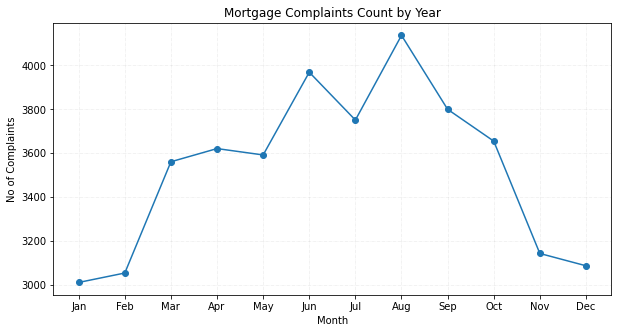

In [ ]:
plt.figure(figsize=(10,5))
#plt.plot(Complaints_2016['Month'], Complaints_2016['#Complaints'], marker='o')
plt.plot(Complaints_2015['Month'], Complaints_2015['#Complaints'], marker='o')
#plt.plot(Complaints_2014['Month'], Complaints_2014['#Complaints'], marker='o')
#plt.legend(['2015', '2014'])
plt.xlabel('Month')
plt.ylabel('No of Complaints')
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.title('Mortgage Complaints Count by Year')

In [ ]:
#Top 10 Companies with Most Complaints
Complaints = df.groupby(['company']).agg({'complaint_id':'count'})
Complaints.rename(columns={'complaint_id':'#Complaints'}, inplace=True)
Complaints.insert(0, "Company", Complaints.index, True)
Complaints = Complaints.sort_values(by=['#Complaints'], ascending=False)[:10]
Complaints
                                                                         

In [ ]:
plt.figure(figsize=(10,5))
plt.barh('Company', '#Complaints', data=Complaints.sort_values(by=['#Complaints'], 
        ascending=True)[:10], color='navy')
plt.ylabel('Company')
plt.xlabel('No of Complaints')
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.title('No. Compaints by Company')

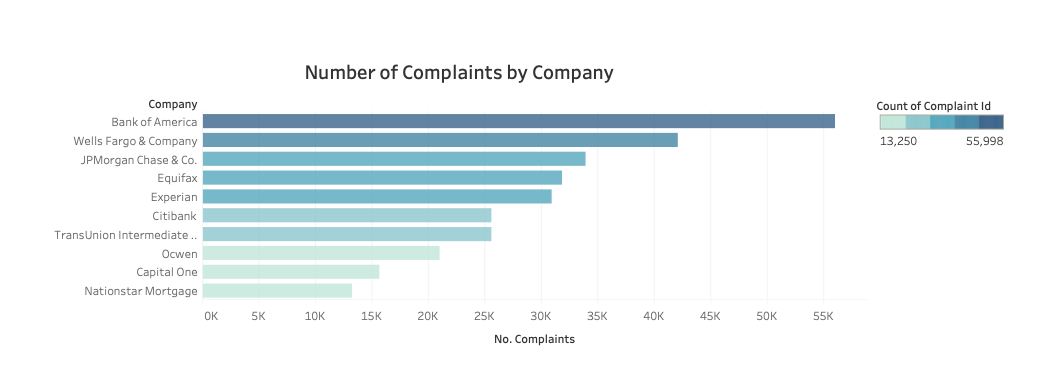





In [ ]:
#Top companies that provided timely response 
df['timely_response'] = df['timely_response'].astype('|S')
df['timely_response'] = df['timely_response'].str.decode("utf-8")
#df[df.timely_response.str.contains('es')]
intime = (df.timely_response.str.contains('Yes')).groupby(df.company).sum().sort_values(ascending=False)[:10]
intime

In [ ]:
#Top companies that DID NOT provid timely response 
not_intime = (df.timely_response == 'No').groupby(df.company).sum().sort_values(ascending=False)[:10]
not_intime

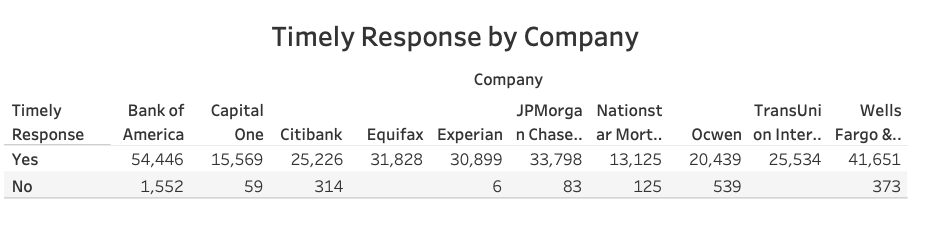

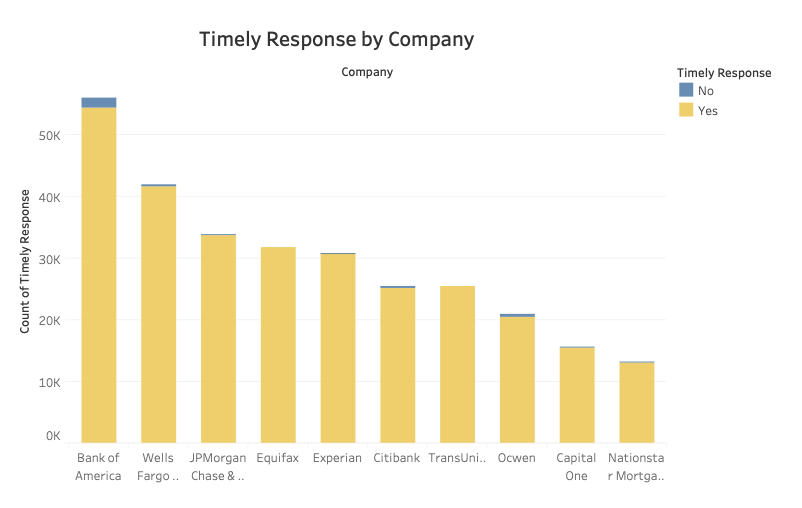